Import & Call

In [139]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

In [141]:
df = pd.read_csv("netflix_data.csv")
print(df)

     show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

Clean Data

1-1. What was the most frequent movie duration in the 1990s? 

1990s means 1990/01/01 - 1999/12/31. → fliter the release_year

In [180]:
in90s = df["release_year"].isin(range(1990, 2000))
print(df[in90s])

     show_id   type                            title            director  \
7         s8  Movie                              187      Kevin Reynolds   
166     s167  Movie                A Dangerous Woman  Stephen Gyllenhaal   
210     s211  Movie           A Night at the Roxbury    John Fortenberry   
238     s239  Movie  A Thin Line Between Love & Hate     Martin Lawrence   
273     s274  Movie                     Aashik Awara         Umesh Mehra   
...      ...    ...                              ...                 ...   
7535   s7536  Movie                      West Beirut        Ziad Doueiri   
7570   s7571  Movie      What's Eating Gilbert Grape     Lasse Hallström   
7623   s7624  Movie                   Wild Wild West    Barry Sonnenfeld   
7681   s7682  Movie                       Wyatt Earp     Lawrence Kasdan   
7694   s7695  Movie                      Yaar Gaddar         Umesh Mehra   

                                                   cast        country  \
7     Samuel 

In [490]:
movies = df["type"] == "Movie"
df_90s_movies = df[in90s & movies]
print(df_90s_movies)

     show_id   type                                              title  \
7         s8  Movie                                                187   
166     s167  Movie                                  A Dangerous Woman   
210     s211  Movie                             A Night at the Roxbury   
238     s239  Movie                    A Thin Line Between Love & Hate   
273     s274  Movie                                       Aashik Awara   
343     s344  Movie                                          Agneepath   
455     s456  Movie                                    American Beauty   
466     s467  Movie                                 American History X   
486     s487  Movie                 An American Tail: Fievel Goes West   
487     s488  Movie  An American Tail: The Mystery of the Night Mon...   
507     s508  Movie                                    Andaz Apna Apna   
592     s593  Movie                                 As Good as It Gets   
623     s624  Movie                  A

In [299]:
duration_counts = df_90s_movies["duration"].value_counts()
print(duration_counts.head(10))

duration
94     8
101    6
93     5
95     5
108    5
96     5
112    4
116    4
89     4
103    4
Name: count, dtype: int64


Q : 1. What was the most frequent movie duration in the 1990s? 


A : 94 min.

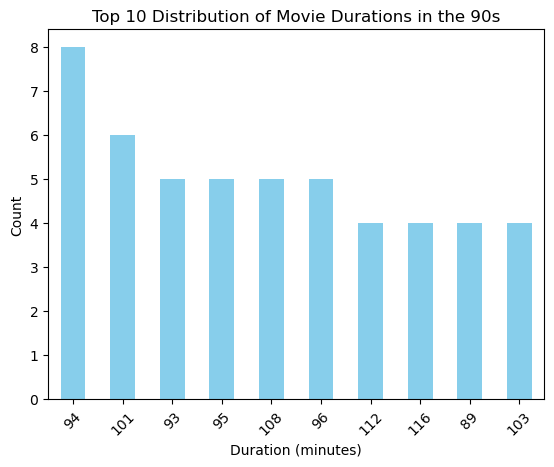

In [305]:
duration_counts.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Distribution of Movie Durations in the 90s")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

1-2.A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [404]:
in90s = df["release_year"].isin(range(1990, 2000))
movies = df["genre"] == "Action"
df_action_movies = df[in90s & movies]
print(df_action_movies)

     show_id   type                                    title  \
507     s508  Movie                          Andaz Apna Apna   
627     s628  Movie    Austin Powers: The Spy Who Shagged Me   
687     s688  Movie                                 Bad Boys   
756     s757  Movie                                  Barsaat   
1002   s1003  Movie                              Blue Streak   
1235   s1236  Movie                            Casino Tycoon   
1236   s1237  Movie                          Casino Tycoon 2   
1604   s1605  Movie                             Dante's Peak   
1849   s1850  Movie                              Dragonheart   
2038   s2039  Movie                EVANGELION: DEATH (TRUE)²   
2059   s2060  Movie                       Executive Decision   
2393   s2394  Movie                                   Ghayal   
2407   s2408  Movie                        Ghulam-E-Musthafa   
2465   s2466  Movie                                GoldenEye   
2550   s2551  Movie                     

In [362]:
df_action_movies.value_counts().sum()

48

In [486]:
short = df_action_movies[df_action_movies["duration"] < 90]

In [307]:
short_movie_count = short.shape[0]
print(f"Number of short action movies (less than 90 minutes) released in the 1990s is : {short_movie_count}")

Number of short action movies (less than 90 minutes) released in the 1990s is : 8


2-1. To determine whether the average duration of movies on Netflix has been declining over the years.

In [211]:
movies1 = df["type"] == "Movie"

In [213]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [460]:
movies1 = df["type"] == "Movie"
ave_duration = df[movies1].groupby("release_year")["duration"].mean()
year_counts = df[movies1].groupby("release_year").size()

#show every rows
pd.set_option('display.max_rows', None)

#show together
df_year_counts = year_counts.to_frame(name="count")
df_ave_duration = ave_duration.to_frame(name="average_duration")
result = df_year_counts.join(df_ave_duration, how="outer")
print(result)

              count  average_duration
release_year                         
1942              2         35.000000
1943              3         62.666667
1944              3         52.000000
1945              3         51.333333
1946              1         58.000000
1947              1         42.000000
1954              2        118.000000
1955              3        100.333333
1956              2        101.000000
1958              3         98.666667
1959              1        143.000000
1960              4        143.500000
1962              3        167.000000
1963              1        194.000000
1964              1        228.000000
1965              2        151.500000
1966              1        116.000000
1967              4        105.250000
1968              4        128.750000
1969              2        140.000000
1970              2         98.000000
1971              5        142.800000
1972              3        110.333333
1973             10        123.100000
1974        

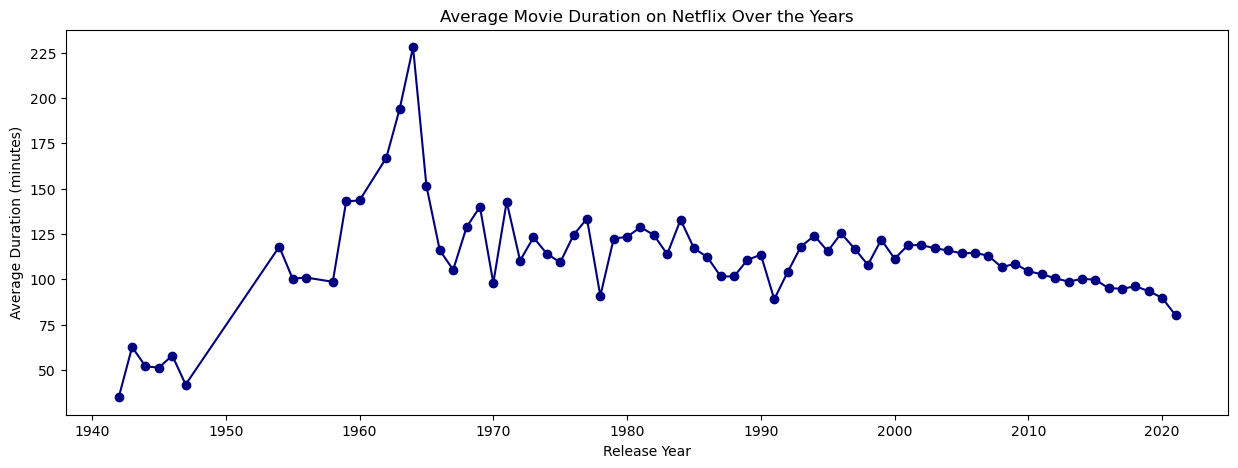

In [265]:
plt.figure(figsize=(15, 5))
plt.plot(ave_duration.index, ave_duration.values, marker="o", linestyle="-", color="navy")
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Movie Duration on Netflix Over the Years")
plt.show()

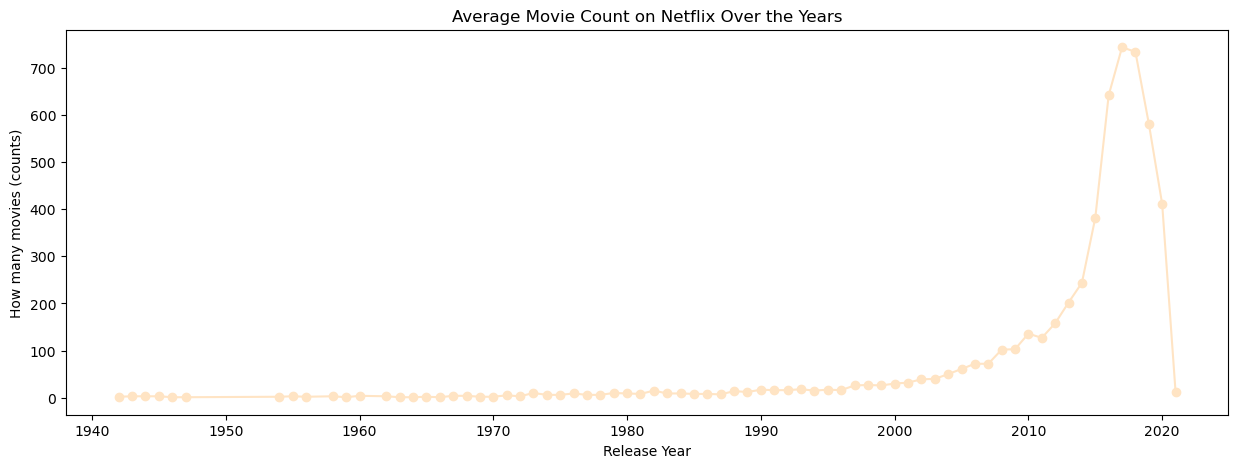

In [267]:
plt.figure(figsize=(15, 5))
plt.plot(year_counts.index, year_counts.values, marker="o", linestyle="-", color="bisque")
plt.xlabel("Release Year")
plt.ylabel("How many movies (counts)")
plt.title("Average Movie Count on Netflix Over the Years")
plt.show()

Result : There was a peak in 1960s , but since the 1970s, durations have stabilized and have slightly declined in recent years.

2-2 Average Genre on Netflix Over the Years

In [374]:
genre = df[movies].groupby("genre")["release_year"].value_counts()
print(genre)

genre                 release_year
Action                2017             80
                      2018             79
                      2016             78
                      2015             50
                      2019             42
                      2020             38
                      2010             26
                      2012             26
                      2013             26
                      2014             23
                      2008             21
                      2011             20
                      2009             17
                      2004             15
                      2007             14
                      2002             12
                      2003             12
                      2005             12
                      1997              9
                      2006              9
                      2001              8
                      1999              7
                      2000              7

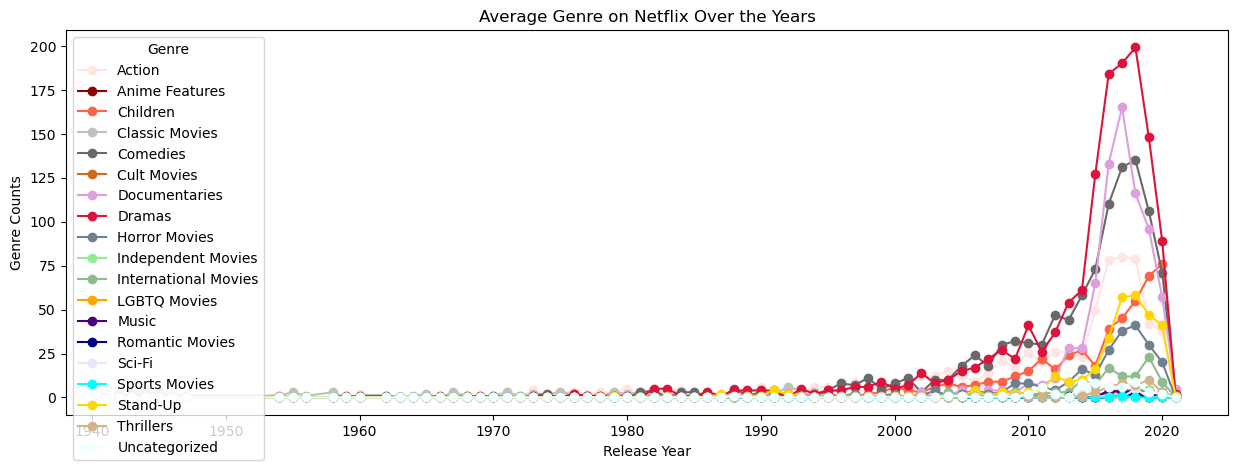

In [495]:
plt.figure(figsize=(15, 5))
genre1 = df[movies].groupby("genre")["release_year"].value_counts().unstack().fillna(0)
colors = ['mistyrose', 'darkred', 'tomato', 'silver', 'dimgray', 'chocolate', 'plum', 'crimson', 'slategray', 'lightgreen', 'darkseagreen', 'orange', 'indigo', 'navy', 'lavender', 'cyan', 'gold', 'tan', 'azure'] 
for i, g in enumerate(genre1.index):
    plt.plot(genre1.columns, genre1.loc[g], marker = 'o', label = g, color = colors[i % len(colors)])
plt.legend(title='Genre', loc='upper left')
plt.xlabel("Release Year")
plt.ylabel("Genre Counts")
plt.title("Average Genre on Netflix Over the Years")
plt.show()

Average Movie Duration on Netflix From 2000-2020

In [476]:
movies1 = df["type"] == "Movie"
ave_duration = df[movies1].groupby("release_year")["duration"].mean()
year_counts = df[movies1].groupby("release_year").size()

#show every rows
pd.set_option('display.max_rows', None)

#show together
df_year_counts = year_counts.to_frame(name="count")
df_ave_duration = ave_duration.to_frame(name="average_duration")
result = df_year_counts.join(df_ave_duration, how="outer")
result_filtered = ave_duration.loc[(ave_duration.index >= 2000) & (ave_duration.index <= 2020)]

print(result_filtered)



release_year
2000    111.366667
2001    118.875000
2002    118.871795
2003    117.125000
2004    115.940000
2005    114.360656
2006    114.541667
2007    113.069444
2008    106.666667
2009    108.621359
2010    104.426471
2011    102.826772
2012    100.620253
2013     98.752475
2014    100.266393
2015     99.827225
2016     95.112150
2017     94.836022
2018     96.170300
2019     93.457045
2020     89.795620
Name: duration, dtype: float64


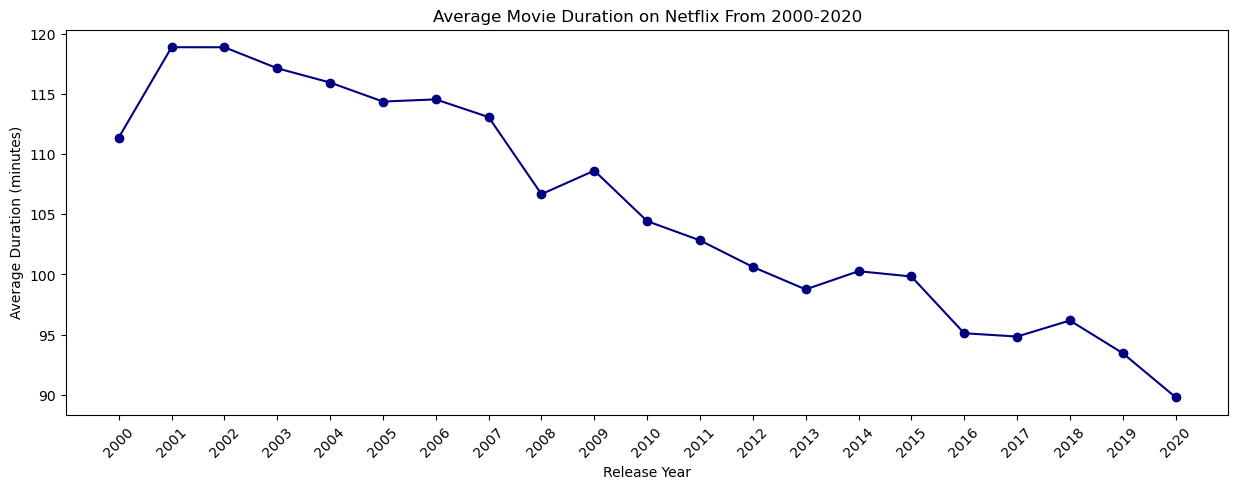

In [478]:
plt.figure(figsize=(15, 5))
plt.plot(result_filtered.index, result_filtered.values, marker="o", linestyle="-", color="navy")
plt.xticks(result_filtered.index, rotation=45)
plt.xlabel("Release Year")
plt.ylabel("Average Duration (minutes)")
plt.title("Average Movie Duration on Netflix From 2000-2020")
plt.show()

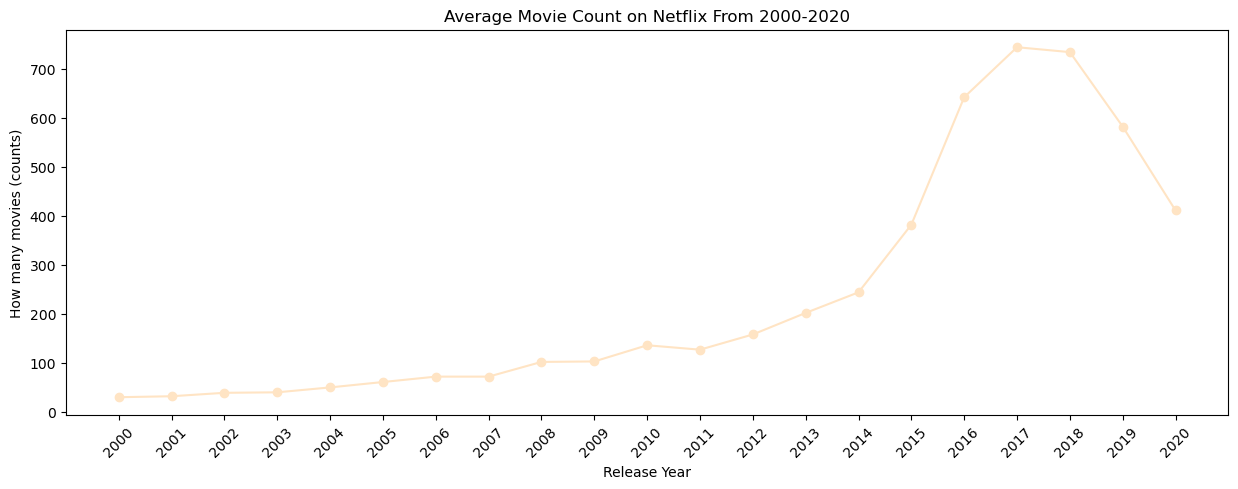

In [482]:
movies1 = df["type"] == "Movie"
ave_duration = df[movies1].groupby("release_year")["duration"].mean()
year_counts = df[movies1].groupby("release_year").size()

#show every rows
pd.set_option('display.max_rows', None)

#show together
df_year_counts = year_counts.to_frame(name="count")
df_ave_duration = ave_duration.to_frame(name="average_duration")
result = df_year_counts.join(df_ave_duration, how="outer")
result_filtered = year_counts.loc[(year_counts.index >= 2000) & (year_counts.index <= 2020)]

plt.figure(figsize=(15, 5))
plt.plot(result_filtered.index, result_filtered.values, marker="o", linestyle="-", color="bisque")
plt.xticks(result_filtered.index, rotation=45)
plt.xlabel("Release Year")
plt.ylabel("How many movies (counts)")
plt.title("Average Movie Count on Netflix From 2000-2020")
plt.show()

